In [2]:
import pandas as pd
import numpy as np


In [3]:
fn=pd.read_csv("bank-full.csv")
fn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
fn.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
fn['marital'] = labelencoder.fit_transform(fn['marital'])
fn['education'] = labelencoder.fit_transform(fn['education'])
fn['default'] = labelencoder.fit_transform(fn['default'])
fn['housing'] = labelencoder.fit_transform(fn['housing'])
fn['loan'] = labelencoder.fit_transform(fn['loan'])
fn['contact'] = labelencoder.fit_transform(fn['contact'])
fn['poutcome'] = labelencoder.fit_transform(fn['poutcome'])
fn['month'] = labelencoder.fit_transform(fn['month'])
fn['job'] = labelencoder.fit_transform(fn['job'])

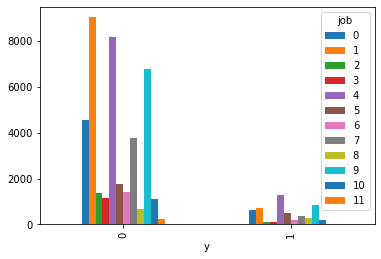

In [76]:
pd.crosstab(fn.y,fn.job).plot(kind = 'bar')

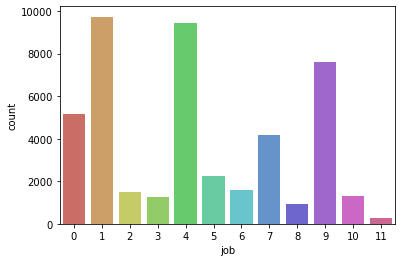

In [78]:
import seaborn as sb
sb.countplot(x="job",data=fn,palette="hls")


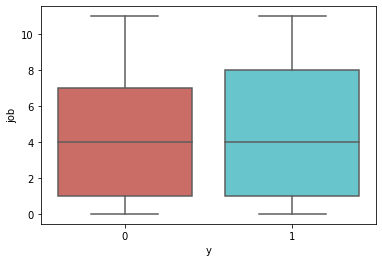

In [79]:
sb.boxplot(x="y",y="job",data=fn,palette="hls")

In [27]:
fn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,yes
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,yes
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,yes
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,no


In [50]:
fn['y'] = labelencoder.fit_transform(fn['y'])

In [51]:
from sklearn.linear_model import LogisticRegression
X = fn.iloc[:,:-1]
Y = fn.iloc[:,-1]
classifier = LogisticRegression()
classifier.fit(X,Y)


C:\Users\vaishali.gunjal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
classifier.coef_

array([[-3.16380279e-02,  1.44206597e-02, -9.20617780e-02,
        -1.31892471e-02, -4.78882148e-03,  3.98478786e-05,
        -1.81412085e-01, -5.34454438e-02, -1.86596787e-01,
        -8.39510601e-03, -6.04861688e-02,  3.26973334e-03,
        -2.66882332e-01, -1.24247885e-03,  1.19917562e-01,
        -1.80431666e-01]])

In [30]:
classifier.predict_proba(X)

array([[0.94857466, 0.05142534],
       [0.9489512 , 0.0510488 ],
       [0.94700924, 0.05299076],
       ...,
       [0.67261838, 0.32738162],
       [0.94037934, 0.05962066],
       [0.58285187, 0.41714813]])

In [54]:
pred=classifier.predict(X)
fn["pred"]=pred
fn['pred'] = labelencoder.fit_transform(fn['pred'])
fn

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,pred
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1,0
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0,0


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(fn['y'],fn['pred'])
print (confusion_matrix)


[[39281   641]
 [ 4439   850]]


In [39]:
pd.crosstab(fn['y'],fn['pred'])

pred,no,yes
y,,
no,39281,641
yes,4439,850


In [41]:
accuracy = sum(fn['y']==fn['pred'])/fn.shape[0]
accuracy


0.8876379642122493

In [45]:
from sklearn.metrics import classification_report 
print (classification_report(fn['y'],fn['pred']))

              precision    recall  f1-score   support

          no       0.90      0.98      0.94     39922
         yes       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,pred)
Logit_roc_score

1.0

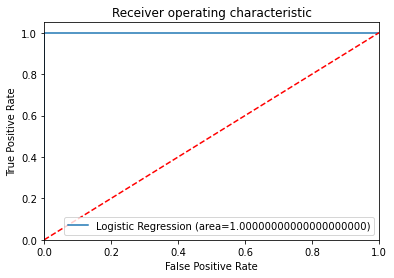

In [68]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,-1]) 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.20f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')#red line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()